### Importing libraries


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

### Loading dataset

In [22]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(url, names=column_names, na_values="?")

print(df.head())
print(df.info())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303

### Task 1: Exploratory Data Analysis (EDA)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       s

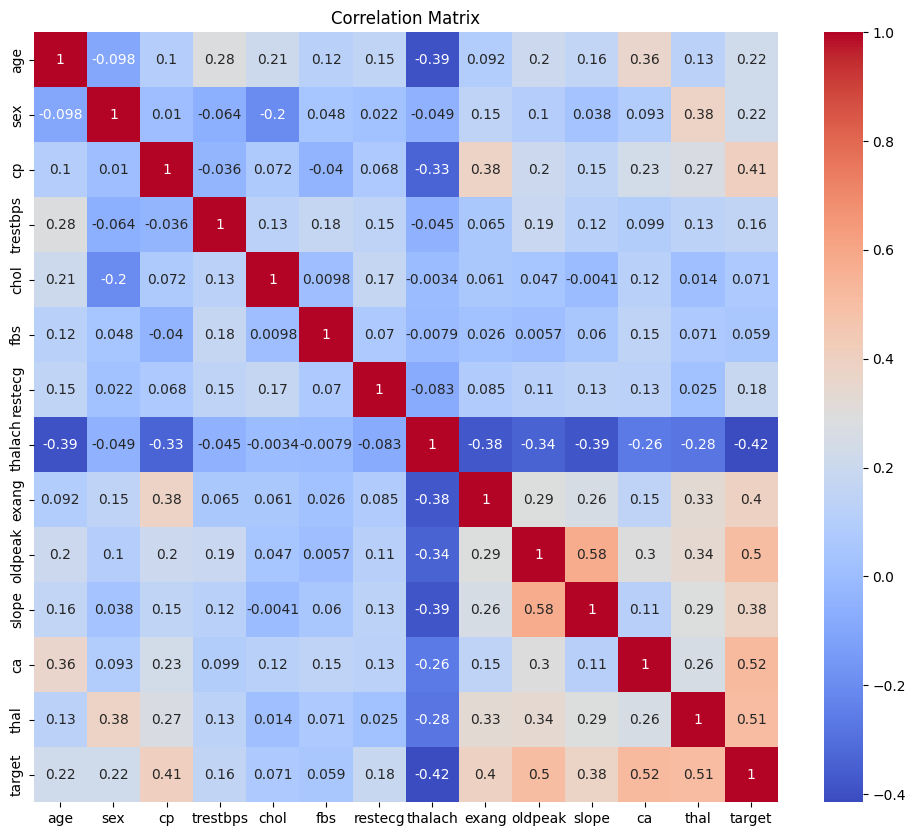

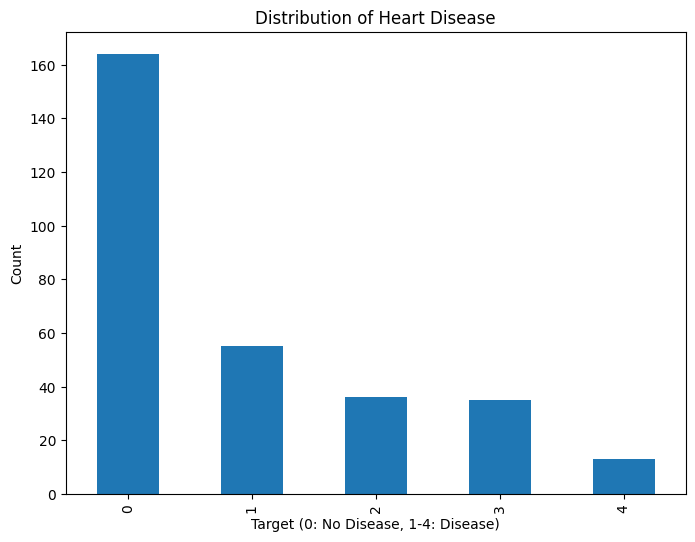

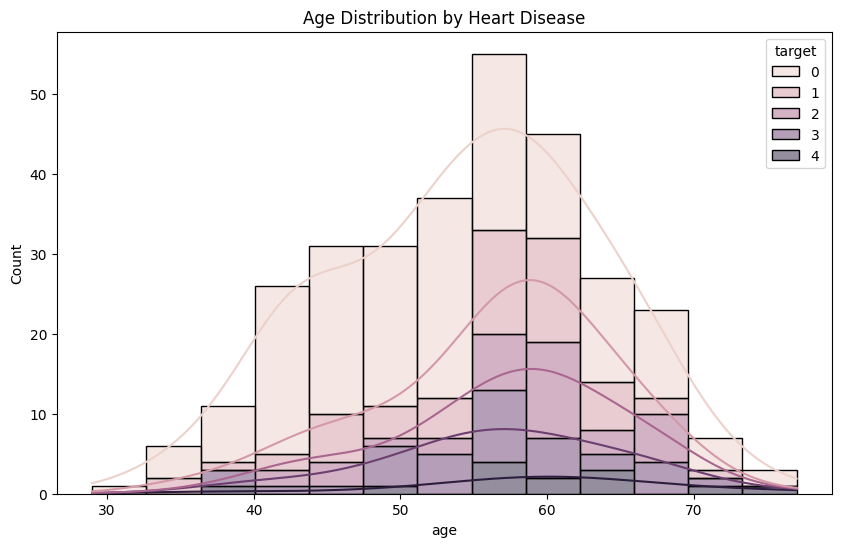

In [23]:
# Check for missing values
print(df.isnull().sum())

# Basic statistics
print(df.describe())

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Distribution of target variable
plt.figure(figsize=(8, 6))
df["target"].value_counts().plot(kind="bar")
plt.title("Distribution of Heart Disease")
plt.xlabel("Target (0: No Disease, 1-4: Disease)")
plt.ylabel("Count")
plt.show()

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="age", hue="target", kde=True, multiple="stack")
plt.title("Age Distribution by Heart Disease")
plt.show()

### Task 2: Data Preprocessing

In [24]:
# Handle missing values
df = df.dropna()

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop("target", axis=1))

# Encode categorical variables (if needed)
# In this case, most variables are already numeric, so we'll skip this step

# Create a new dataframe with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])

### Task 3: Applying Clustering Algorithms

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


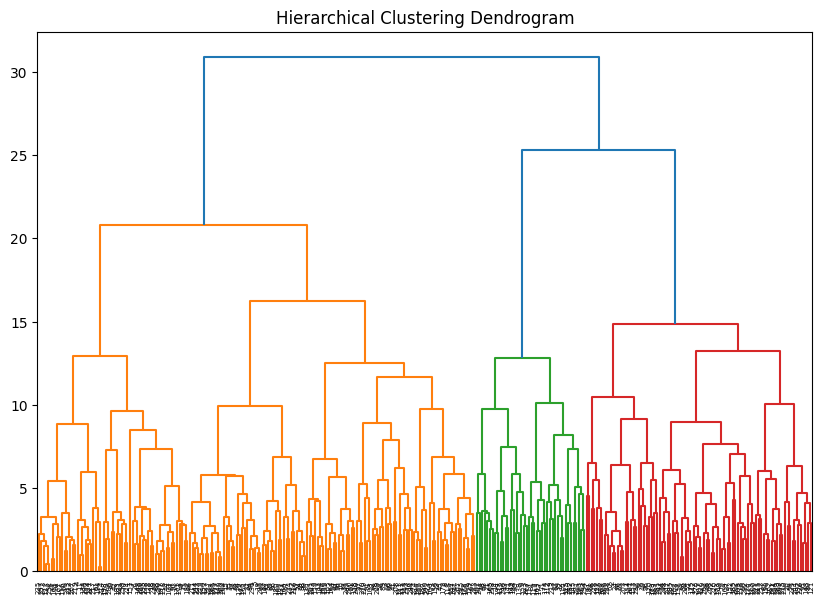

In [25]:
# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Hierarchical clustering
linkage_matrix = linkage(scaled_df, method="ward")
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_df)

### Task 4: Dimensionality Reduction and Visualization

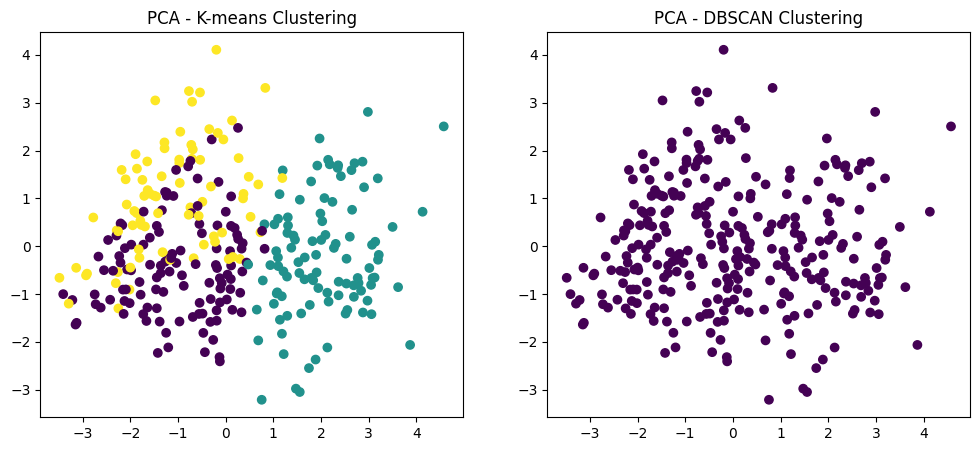

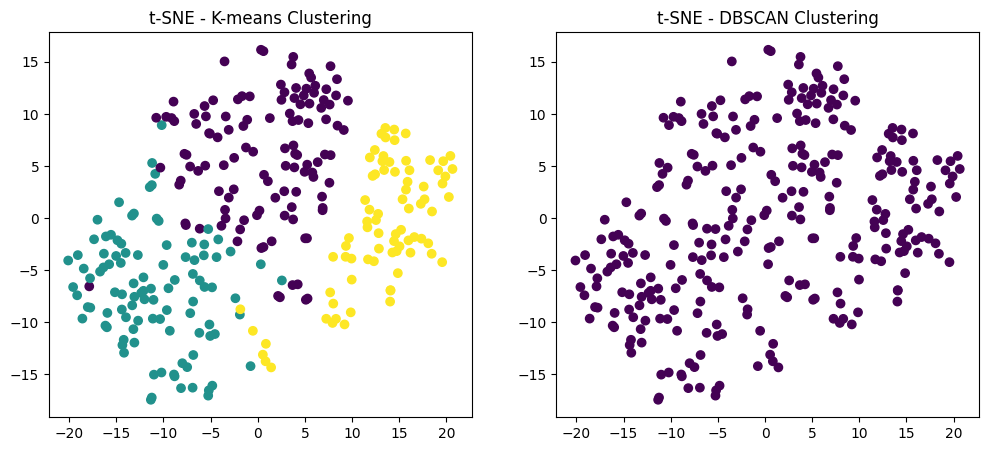

In [26]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_df)

# Visualize PCA results
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap="viridis")
plt.title("PCA - K-means Clustering")

plt.subplot(122)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dbscan_labels, cmap="viridis")
plt.title("PCA - DBSCAN Clustering")
plt.show()

# Visualize t-SNE results
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans_labels, cmap="viridis")
plt.title("t-SNE - K-means Clustering")

plt.subplot(122)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=dbscan_labels, cmap="viridis")
plt.title("t-SNE - DBSCAN Clustering")
plt.show()

### Task 5: Gaussian Mixture Models

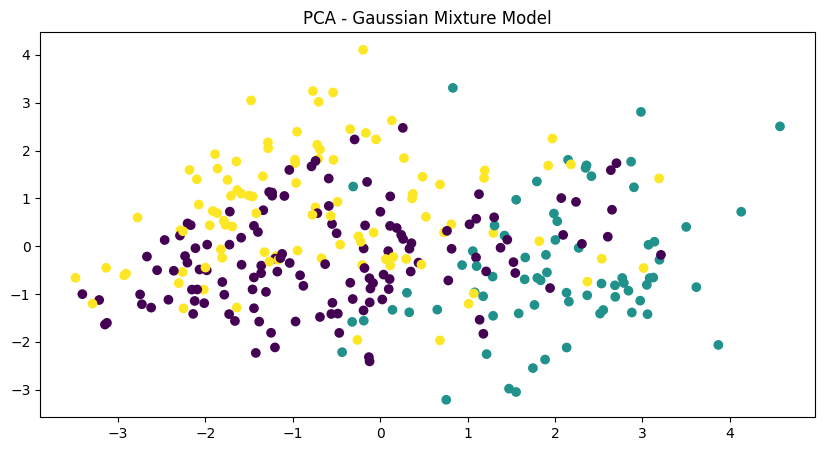

Top 5 risk factors:
    feature  importance
12     thal    0.691777
1       sex    0.651359
8     exang    0.636967
2        cp    0.375752
7   thalach    0.370295


In [27]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(scaled_df)

# Visualize GMM results
plt.figure(figsize=(10, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=gmm_labels, cmap="viridis")
plt.title("PCA - Gaussian Mixture Model")
plt.show()

# Identify risk factors
feature_importance = np.abs(gmm.means_).mean(axis=0)
risk_factors = pd.DataFrame({"feature": scaled_df.columns, "importance": feature_importance})
risk_factors = risk_factors.sort_values("importance", ascending=False)
print("Top 5 risk factors:")
print(risk_factors.head())

### Task 6: Evaluation Metrics

In [28]:
def safe_silhouette_score(X, labels):
    unique_labels = np.unique(labels)
    if len(unique_labels) < 2 or len(unique_labels) == len(labels):
        return None
    return silhouette_score(X, labels)

# K-means evaluation
kmeans_silhouette = safe_silhouette_score(scaled_df, kmeans_labels)
kmeans_db = davies_bouldin_score(scaled_df, kmeans_labels)

# DBSCAN evaluation
dbscan_silhouette = safe_silhouette_score(scaled_df, dbscan_labels)
dbscan_db = davies_bouldin_score(scaled_df, dbscan_labels) if len(np.unique(dbscan_labels)) > 1 else None

# GMM evaluation
gmm_silhouette = safe_silhouette_score(scaled_df, gmm_labels)
gmm_db = davies_bouldin_score(scaled_df, gmm_labels)

print("Clustering Results:")
print(f"K-means: {len(np.unique(kmeans_labels))} clusters")
print(f"DBSCAN: {len(np.unique(dbscan_labels))} clusters")
print(f"GMM: {len(np.unique(gmm_labels))} clusters")

print("\nSilhouette Scores:")
print(f"K-means: {kmeans_silhouette:.3f}" if kmeans_silhouette is not None else "K-means: N/A")
print(f"DBSCAN: {dbscan_silhouette:.3f}" if dbscan_silhouette is not None else "DBSCAN: N/A")
print(f"GMM: {gmm_silhouette:.3f}" if gmm_silhouette is not None else "GMM: N/A")

print("\nDavies-Bouldin Index:")
print(f"K-means: {kmeans_db:.3f}")
print(f"DBSCAN: {dbscan_db:.3f}" if dbscan_db is not None else "DBSCAN: N/A")
print(f"GMM: {gmm_db:.3f}")

Clustering Results:
K-means: 3 clusters
DBSCAN: 1 clusters
GMM: 3 clusters

Silhouette Scores:
K-means: 0.130
DBSCAN: N/A
GMM: 0.099

Davies-Bouldin Index:
K-means: 2.273
DBSCAN: N/A
GMM: 2.624


### Task 7: Comparison and Conclusion

In [29]:
print("\nClustering Algorithm Comparison:")
print("1. K-means:")
print(f"   Silhouette Score: {kmeans_silhouette:.3f}" if kmeans_silhouette is not None else "   Silhouette Score: N/A")
print(f"   Davies-Bouldin Index: {kmeans_db:.3f}")
print("2. DBSCAN:")
print(f"   Silhouette Score: {dbscan_silhouette:.3f}" if dbscan_silhouette is not None else "   Silhouette Score: N/A")
print(f"   Davies-Bouldin Index: {dbscan_db:.3f}" if dbscan_db is not None else "   Davies-Bouldin Index: N/A")
print("3. Gaussian Mixture Model:")
print(f"   Silhouette Score: {gmm_silhouette:.3f}" if gmm_silhouette is not None else "   Silhouette Score: N/A")
print(f"   Davies-Bouldin Index: {gmm_db:.3f}")

print("\nConclusion:")
valid_algorithms = [
    ("K-means", kmeans_silhouette, kmeans_db),
    ("DBSCAN", dbscan_silhouette, dbscan_db),
    ("GMM", gmm_silhouette, gmm_db)
]

valid_algorithms = [(name, sil, db) for name, sil, db in valid_algorithms if sil is not None and db is not None]

if valid_algorithms:
    best_algorithm = max(valid_algorithms, key=lambda x: x[1] - x[2])
    print(f"Based on the evaluation metrics, the best performing clustering algorithm is:")
    print(f"{best_algorithm[0]} (Highest Silhouette Score and Lowest Davies-Bouldin Index)")
else:
    print("Unable to determine the best algorithm due to insufficient valid results.")

print("\nNote: If any metrics show as N/A, it means that the clustering algorithm")
print("produced invalid results for that metric (e.g., only one cluster).")
print("In this case, we may need to adjust the algorithm's parameters.")


Clustering Algorithm Comparison:
1. K-means:
   Silhouette Score: 0.130
   Davies-Bouldin Index: 2.273
2. DBSCAN:
   Silhouette Score: N/A
   Davies-Bouldin Index: N/A
3. Gaussian Mixture Model:
   Silhouette Score: 0.099
   Davies-Bouldin Index: 2.624

Conclusion:
Based on the evaluation metrics, the best performing clustering algorithm is:
K-means (Highest Silhouette Score and Lowest Davies-Bouldin Index)

Note: If any metrics show as N/A, it means that the clustering algorithm
produced invalid results for that metric (e.g., only one cluster).
In this case, we may need to adjust the algorithm's parameters.
